# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Missi Hansson

Vem du har presenterat för: Linus Rundberg Streuli, Marcus Eklund

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

In [2]:
model = ResNet50(weights='imagenet')

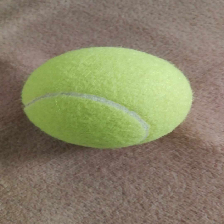

In [3]:
# img_path = 'zebra.jpg'
#img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [4]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [5]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [7]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.789375e-06), ('n03942813', 'ping-pong_ball', 5.5037702e-08)]


# 1. Take some pictures yourself and predict their class.

Processing Stitch.jpeg


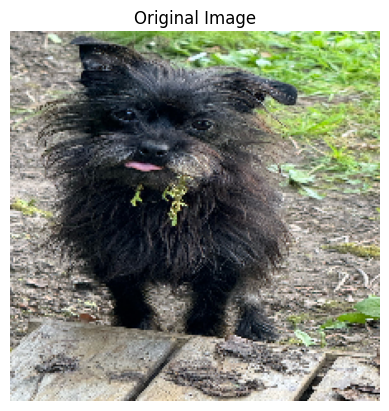

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predictions for Stitch.jpeg:
Pomeranian: 79.69%
affenpinscher: 17.29%
cairn: 2.35%
Processing Stitch_2.jpg


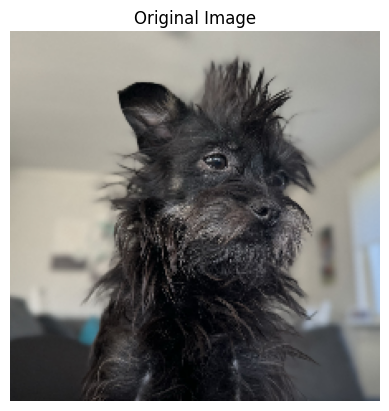

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predictions for Stitch_2.jpg:
toy_poodle: 43.24%
Scotch_terrier: 37.62%
affenpinscher: 7.41%
Processing Baby_Stitch.JPG


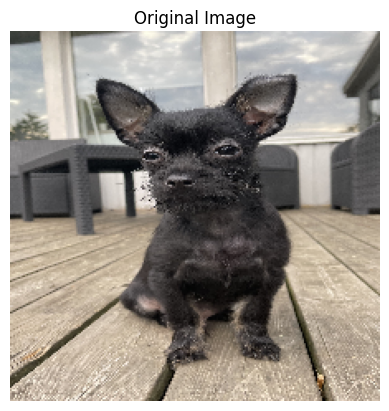

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predictions for Baby_Stitch.JPG:
Scotch_terrier: 17.62%
groenendael: 8.73%
schipperke: 8.49%
Processing Baby_Stitch_2.JPG


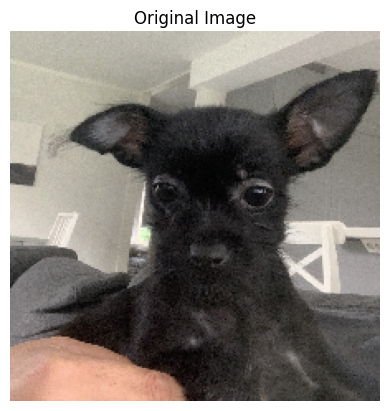

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predictions for Baby_Stitch_2.JPG:
Scotch_terrier: 16.75%
photocopier: 8.28%
groenendael: 6.15%


In [ ]:
def get_training_augmentation():
    return A.Compose([
        A.VerticalFlip(p=0.5),
        #A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
        A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), ratio=(0.75, 1.33), p=0.5),
        A.Rotate(limit=30, p=0.5),
        A.RandomScale(scale_limit=0.2, p=0.5)  
        #A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5)
    ])
augmentation = get_training_augmentation()

def image_load_display(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    return img


def predict_image(img_path, augmentation):
    print(f"Processing {img_path}")
    img = image_load_display(img_path)
    img_array = image.img_to_array(img)
    augmented_img = augmentation(image=img_array)['image']  
    x = np.expand_dims(augmented_img, axis=0)  
    x = preprocess_input(x)  
    preds = model.predict(x)  
    decoded_preds = decode_predictions(preds, top=3)[0] 
    print(f"Predictions for {img_path}:")
    for pred in decoded_preds:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")


image_stitch = ['Stitch.jpeg','Stitch_2.jpg', 'Baby_Stitch.JPG', 'Baby_Stitch_2.JPG']
image_sven = ['Baby_Sven.JPG', 'Sven.jpg']
image_flowers = ['Flower.jpeg', 'Flowers_2.JPG']
image_toaster = ['toaster.jpg', 'toaster_2.jpg']
image_bed = ['Bed.jpeg', 'Bed_2.jpg']
image_other =['Kaffekokare.jpg', 'EL_Kick.jpg', 'Dammsugare.jpg', 'Lampa.jpeg']

for img_path in image_stitch:
    predict_image(img_path, augmentation)


# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Pretrained models" är kraftfulla eftersom de sparar tid och resurser genom att använda redan tränade modeller för att lösa nya problem. Dessa modeller har lärt sig användbara funktioner från stora datamängder och kan anpassas till olika uppgifter, vilket ger hög prestanda även med begränsade data.